# Imports

In [13]:
%load_ext autoreload
import sys
import os
sys.path.append(os.path.dirname(os.path.abspath('.')))
sys.path.append(os.path.dirname(os.path.dirname((os.path.abspath('.')))))
import torch.optim as optim
import torch.nn.functional as F

from src.data.dataloader import fetch_mnist_loader, fetch_cifar_loader
from src.model.normalizing_flow.classic.flow import FlowModel, train_flow_inverse_noise, restore_noisy_data, restore_blur_data, restore_lostdata_data, train_flow_inverse_lostdata, train_flow_inverse_blur
from src.utils.viz import display_restoration_process

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the dataset

In [3]:
data_train_loader, data_test_loader, (n_channels, n_rows, n_cols) = fetch_cifar_loader(
    n_samples_train=1000,
    n_samples_test=1000,
    batch_size=256,
    path_to_data="../../src/data/"
)


Files already downloaded and verified
Files already downloaded and verified


# Train and test

In [5]:
# Define the encoding dimension
z_dim = 20

# Create the model
model = FlowModel(
    flows=['PlanarFlow'] * 4,
    hidden_sizes_encoder=[512, 256],
    hidden_sizes_decoder=[256, 512],
    z_dim=z_dim,
    n_channels=n_channels,
    n_rows=n_rows,
    n_cols=n_cols,
    activation=F.elu
)

## Noise restoration

In [7]:
# Set the noise parameters
noise_mean = 0.1
noise_std = 0.1

# Define the optimizer of the model
optimizer = optim.Adam(model.parameters(), lr=10e-4)

# Train the model
n_epoch = 500
model = train_flow_inverse_noise(
    model,
    optimizer,
    data_train_loader,
    n_epoch=n_epoch,
    noise_mean=noise_mean,
    noise_std=noise_std
)


/opt/homebrew/anaconda3/envs/ml-research-seminar-env/lib/python3.10/site-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


[*] Epoch: 0 Average loss: 1874.1659
[*] Epoch: 1 Average loss: 1658.0711
[*] Epoch: 2 Average loss: 1645.8759
[*] Epoch: 3 Average loss: 1637.1671
[*] Epoch: 4 Average loss: 1630.5857
[*] Epoch: 5 Average loss: 1629.1982
[*] Epoch: 6 Average loss: 1624.0526
[*] Epoch: 7 Average loss: 1621.6357
[*] Epoch: 8 Average loss: 1618.8468
[*] Epoch: 9 Average loss: 1614.9720
[*] Epoch: 10 Average loss: 1604.1811
[*] Epoch: 11 Average loss: 1598.0682
[*] Epoch: 12 Average loss: 1594.8554
[*] Epoch: 13 Average loss: 1608.9796
[*] Epoch: 14 Average loss: 1594.6502
[*] Epoch: 15 Average loss: 1582.1817
[*] Epoch: 16 Average loss: 1580.8325
[*] Epoch: 17 Average loss: 1570.0686
[*] Epoch: 18 Average loss: 1572.5289
[*] Epoch: 19 Average loss: 1567.1302
[*] Epoch: 20 Average loss: 1565.8456
[*] Epoch: 21 Average loss: 1559.8358
[*] Epoch: 22 Average loss: 1561.5051
[*] Epoch: 23 Average loss: 1557.6184
[*] Epoch: 24 Average loss: 1557.4055
[*] Epoch: 25 Average loss: 1551.6636
[*] Epoch: 26 Average 

/Users/yannismoudere/Courses/ml-research-seminar/ML-Research-Seminar/src/utils/viz.py:42: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3281.)
  axs[0][j].imshow(pytorch_to_numpy(target_data_list[0][j].T).squeeze())
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for intege

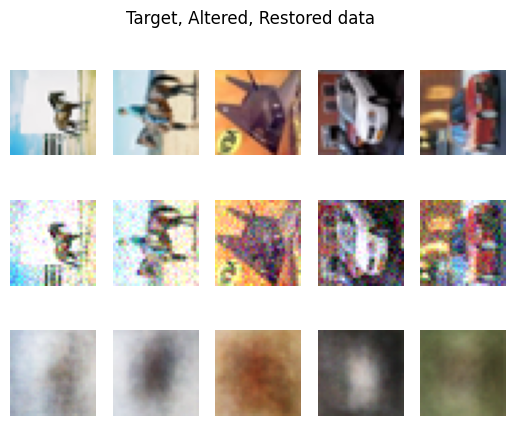

In [8]:
# Try restoring data from the test set with the same noise applied as for the training set
target_data_list, noisy_data_list, restored_data_list = restore_noisy_data(
    model,
    data_test_loader,
    noise_mean=noise_mean,
    noise_std=noise_std
)

# Display the results
display_restoration_process(
    target_data_list,
    noisy_data_list,
    restored_data_list,
    transpose = True,
    max_samples=5
)

## Lost data restoration

In [11]:
# Set the alteration parameters
square_size = 7

# Define the optimizer of the model
optimizer = optim.Adam(model.parameters(), lr=10e-4)

# Train the model
n_epoch = 500
model = train_flow_inverse_lostdata(
    model,
    optimizer,
    data_train_loader,
    n_epoch=n_epoch,
    square_size=square_size
)

[*] Epoch: 0 Average loss: 1688.5983
[*] Epoch: 1 Average loss: 1562.3216
[*] Epoch: 2 Average loss: 1515.4268
[*] Epoch: 3 Average loss: 1514.5189
[*] Epoch: 4 Average loss: 1508.5160
[*] Epoch: 5 Average loss: 1496.3422
[*] Epoch: 6 Average loss: 1490.4848
[*] Epoch: 7 Average loss: 1489.8441
[*] Epoch: 8 Average loss: 1474.4843
[*] Epoch: 9 Average loss: 1475.7252
[*] Epoch: 10 Average loss: 1471.2464
[*] Epoch: 11 Average loss: 1467.8623
[*] Epoch: 12 Average loss: 1465.3259
[*] Epoch: 13 Average loss: 1463.9597
[*] Epoch: 14 Average loss: 1460.1043
[*] Epoch: 15 Average loss: 1461.6179
[*] Epoch: 16 Average loss: 1458.7655
[*] Epoch: 17 Average loss: 1457.4999
[*] Epoch: 18 Average loss: 1454.4448
[*] Epoch: 19 Average loss: 1455.8886
[*] Epoch: 20 Average loss: 1453.5901
[*] Epoch: 21 Average loss: 1451.8167
[*] Epoch: 22 Average loss: 1448.3247
[*] Epoch: 23 Average loss: 1449.2913
[*] Epoch: 24 Average loss: 1453.9217
[*] Epoch: 25 Average loss: 1455.7771
[*] Epoch: 26 Average 

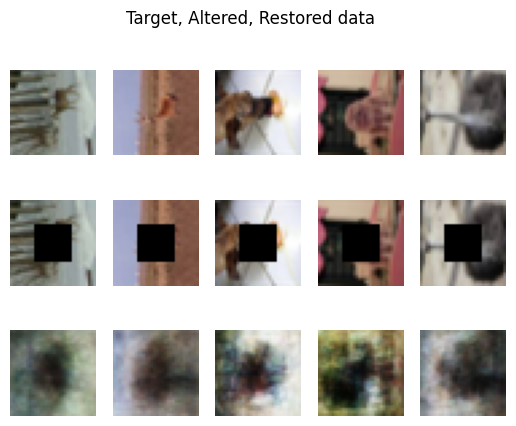

In [18]:


# Try restoring data from the test set with the same noise applied as for the training set
target_data_list, noisy_data_list, restored_data_list = restore_lostdata_data(
    model,
    data_test_loader,
    square_size=square_size
)

# Display the results
display_restoration_process(
    target_data_list,
    noisy_data_list,
    restored_data_list,
    transpose = True,
    max_samples=5
)

## Gaussian blur restoration

In [14]:
# Set the blur parameters
kernel_size = 7
sigma = 5
# Define the optimizer of the model
optimizer = optim.Adam(model.parameters(), lr=10e-4)

# Train the model
n_epoch = 500
model = train_flow_inverse_blur(
    model,
    optimizer,
    data_train_loader,
    n_epoch=n_epoch,
    kernel_size=kernel_size,
    sigma=sigma
)


[*] Epoch: 0 Average loss: 1711.5124
[*] Epoch: 1 Average loss: 1531.0918
[*] Epoch: 2 Average loss: 1511.8084
[*] Epoch: 3 Average loss: 1507.7573
[*] Epoch: 4 Average loss: 1483.7554
[*] Epoch: 5 Average loss: 1471.9146
[*] Epoch: 6 Average loss: 1470.5526
[*] Epoch: 7 Average loss: 1459.8638
[*] Epoch: 8 Average loss: 1454.5270
[*] Epoch: 9 Average loss: 1451.2835
[*] Epoch: 10 Average loss: 1444.7996
[*] Epoch: 11 Average loss: 1444.9186
[*] Epoch: 12 Average loss: 1439.5558
[*] Epoch: 13 Average loss: 1437.9725
[*] Epoch: 14 Average loss: 1432.5367
[*] Epoch: 15 Average loss: 1436.4593
[*] Epoch: 16 Average loss: 1430.1482
[*] Epoch: 17 Average loss: 1428.0477
[*] Epoch: 18 Average loss: 1425.1964
[*] Epoch: 19 Average loss: 1426.4599
[*] Epoch: 20 Average loss: 1418.8041
[*] Epoch: 21 Average loss: 1417.1658
[*] Epoch: 22 Average loss: 1427.7077
[*] Epoch: 23 Average loss: 1422.7469
[*] Epoch: 24 Average loss: 1421.7492
[*] Epoch: 25 Average loss: 1415.7273
[*] Epoch: 26 Average 

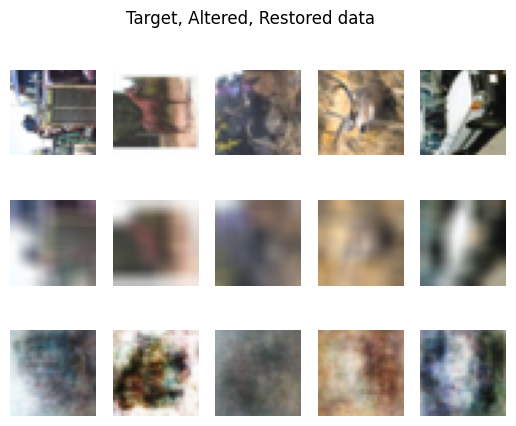

In [16]:
# Try restoring data from the test set with the same noise applied as for the training set
target_data_list, noisy_data_list, restored_data_list = restore_blur_data(
    model,
    data_test_loader,
    kernel_size=kernel_size,
    sigma=sigma
)

# Display the results
display_restoration_process(
    target_data_list,
    noisy_data_list,
    restored_data_list,
    transpose = True,
    max_samples=5
)
